In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

WC_csv ="WorldCupMatches_HG.csv"

WC_df = pd.read_csv(WC_csv)

WC_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Results,Winning Team,Win conditions,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,H,France,,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,H,USA,,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,H,Yugoslavia,,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,H,Romania,,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,H,Argentina,,1085,ARG,FRA


In [134]:
unique_countries_home=WC_df['Home Team Name']
unique_countries_home

0           France
1              USA
2       Yugoslavia
3          Romania
4        Argentina
          ...     
831    Netherlands
832         Brazil
833    Netherlands
834         Brazil
835        Germany
Name: Home Team Name, Length: 836, dtype: object

In [135]:
unique_countries_away=WC_df['Away Team Name']
unique_countries_away

0           Mexico
1          Belgium
2           Brazil
3             Peru
4           France
          ...     
831     Costa Rica
832        Germany
833      Argentina
834    Netherlands
835      Argentina
Name: Away Team Name, Length: 836, dtype: object

In [136]:
WC_df['Home Team Name']=WC_df['Home Team Name'].replace({'German DR':'Germany','Germany FR':'Germany'})
WC_df['Away Team Name']=WC_df['Away Team Name'].replace({'German DR':'Germany','Germany FR':'Germany'})

In [137]:
home_team_points=pd.DataFrame({'Team':WC_df['Home Team Name'],
                         'Number of Wins':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],      
                         'Points':[2 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']]})



away_team_points=pd.DataFrame({'Team':WC_df['Away Team Name'],
                         'Number of Wins':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],
                         'Points':[2 if i=='A' else 1 if i=='D' else 0 for i in WC_df['Results']]})

team_points=home_team_points.append(away_team_points).groupby('Team').sum()

team_points

,Number of Wins,Number of Losses,Number of Draws,Points
Team,,,,
Algeria,3,7,3,9
Angola,0,1,2,2
Argentina,42,21,14,98
Australia,2,8,3,7
Austria,12,13,4,28
...,...,...,...,...
"rn"">Bosnia and Herzegovina",1,2,0,2
"rn"">Republic of Ireland",2,3,8,12
"rn"">Serbia and Montenegro",0,3,0,0


In [138]:
games_played=team_points['Number of Wins']+team_points['Number of Losses']+team_points['Number of Draws']
team_points['Number of Games Played'] = games_played
team_points=team_points[['Number of Games Played','Number of Wins','Number of Losses','Number of Draws','Points']]
team_points

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Team,,,,,
Algeria,13,3,7,3,9
Angola,3,0,1,2,2
Argentina,77,42,21,14,98
Australia,13,2,8,3,7
Austria,29,12,13,4,28
...,...,...,...,...,...
"rn"">Bosnia and Herzegovina",3,1,2,0,2
"rn"">Republic of Ireland",13,2,3,8,12
"rn"">Serbia and Montenegro",3,0,3,0,0


In [139]:
team_points.sort_values(by=['Points'], ascending=False).head(30)

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Team,,,,,
Germany,112,68,22,22,158
Brazil,104,70,17,17,157
Italy,83,45,17,21,111
Argentina,77,42,21,14,98
England,62,26,16,20,72
Spain,59,29,18,12,70
France,59,28,19,12,68
Netherlands,50,27,11,12,66
Uruguay,51,20,19,12,52


Text(0, 0.5, 'Number Points')

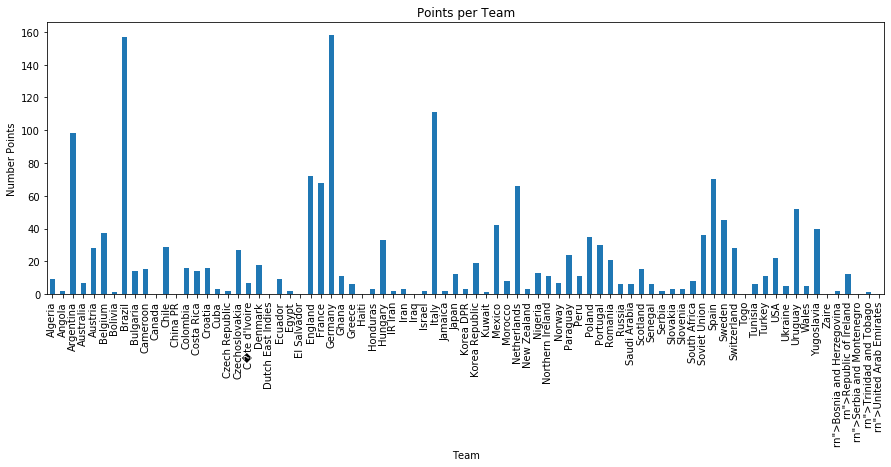

In [140]:
team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Points')

#labels
plt.title("Points per Team")
plt.ylabel("Number Points")

In [141]:
best_team_points=team_points.nlargest(10, ['Points'])
best_team_points

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Team,,,,,
Germany,112,68,22,22,158
Brazil,104,70,17,17,157
Italy,83,45,17,21,111
Argentina,77,42,21,14,98
England,62,26,16,20,72
Spain,59,29,18,12,70
France,59,28,19,12,68
Netherlands,50,27,11,12,66
Uruguay,51,20,19,12,52


Text(0, 0.5, 'Number Points')

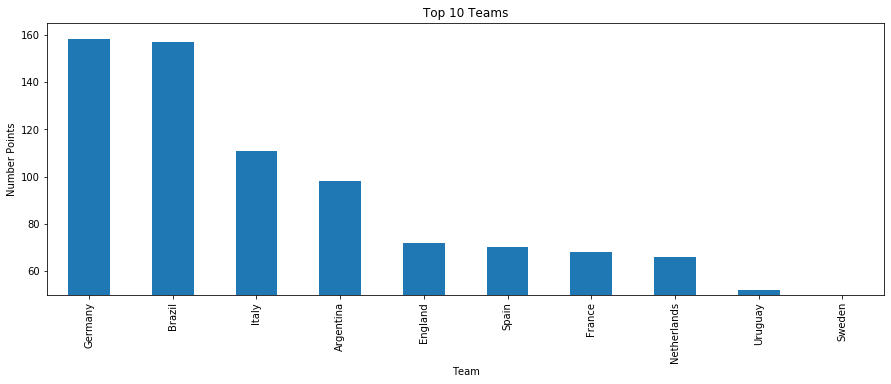

In [142]:
best_team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Points')

plt.ylim(50, 165)
#labels
plt.title("Top 10 Teams")
plt.ylabel("Number Points")

In [144]:
team_points.to_csv("Team_Points.csv",
                  encoding="utf-8", index=True, header=True)